In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import plotly.express as px

In [14]:
pokemon = pd.read_csv('pokedex.csv', na_values = '?')
pokemon.head()

,Nat,Pokemon,HP,Atk,Def,SpA,SpD,Spe,Total,Type I,Type II,Ability I,Ability II,Hidden Ability,EV Worth,Gender,Egg Group I,Egg Group II,Catch,Evolve
0,1,Bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0,318,Grass,Poison,Overgrow,NaN,Chlorophyll,1 SpA,M (87.5%),Monster,Grass,45.0,NaN
1,2,Ivysaur,60.0,62.0,63.0,80.0,80.0,60.0,405,Grass,Poison,Overgrow,NaN,Chlorophyll,1 SpA/1 SpD,M (87.5%),Monster,Grass,45.0,Lv. 16
2,3,Venusaur,80.0,82.0,83.0,100.0,100.0,80.0,525,Grass,Poison,Overgrow,NaN,Chlorophyll,2 SpA/1 SpD,M (87.5%),Monster,Grass,45.0,Lv. 32
3,4,Charmander,39.0,52.0,43.0,60.0,50.0,65.0,309,Fire,NaN,Blaze,NaN,Solar Power,1 Spe,M (87.5%),Monster,Dragon,45.0,NaN
4,5,Charmeleon,58.0,64.0,58.0,80.0,65.0,80.0,405,Fire,NaN,Blaze,NaN,Solar Power,1 SpA/1 Spe,M (87.5%),Monster,Dragon,45.0,Lv. 16


In [15]:
pokemon_tidy = pokemon.drop(columns = ['Type II', \
                                       'Ability II', \
                                       'Hidden Ability', \
                                       'EV Worth', \
                                       'Gender', \
                                       'Egg Group I', \
                                       'Egg Group II', \
                                       'Evolve']).dropna()
pokemon_tidy
                                       

,Nat,Pokemon,HP,Atk,Def,SpA,SpD,Spe,Total,Type I,Ability I,Catch
0,1,Bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0,318,Grass,Overgrow,45.0
1,2,Ivysaur,60.0,62.0,63.0,80.0,80.0,60.0,405,Grass,Overgrow,45.0
2,3,Venusaur,80.0,82.0,83.0,100.0,100.0,80.0,525,Grass,Overgrow,45.0
3,4,Charmander,39.0,52.0,43.0,60.0,50.0,65.0,309,Fire,Blaze,45.0
4,5,Charmeleon,58.0,64.0,58.0,80.0,65.0,80.0,405,Fire,Blaze,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1012,"1,013",Sinistcha,71.0,60.0,106.0,121.0,80.0,70.0,508,Grass,Hospitality,60.0
1013,"1,014",Okidogi,88.0,128.0,115.0,58.0,86.0,80.0,555,Poison,Toxic Chain,3.0
1014,"1,015",Munkidori,88.0,75.0,66.0,130.0,90.0,106.0,555,Poison,Toxic Chain,3.0
1015,"1,016",Fezandipiti,88.0,91.0,82.0,70.0,125.0,99.0,555,Poison,Toxic Chain,3.0


In [20]:
pokemon_sorted = pokemon_tidy.sort_values(by = 'Nat', ascending = True)
pokemon_sorted

,Nat,Pokemon,HP,Atk,Def,SpA,SpD,Spe,Total,Type I,Ability I,Catch
0,1,Bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0,318,Grass,Overgrow,45.0
999,"1,000",Gholdengo,87.0,60.0,95.0,133.0,91.0,84.0,550,Ghost,Good as Gold,45.0
1000,"1,001",Wo-Chien,85.0,85.0,100.0,95.0,165.0,70.0,600,Dark,Tablets of Ruin,6.0
1001,"1,002",Chien-Pao,80.0,120.0,80.0,90.0,65.0,135.0,570,Dark,Sword of Ruin,6.0
1002,"1,003",Ting-Lu,155.0,110.0,125.0,55.0,80.0,45.0,570,Dark,Vessle of Ruin,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Iron Thorns,100.0,134.0,110.0,70.0,84.0,72.0,570,Rock,Quark Drive,30.0
995,996,Frigibax,65.0,75.0,45.0,35.0,45.0,55.0,320,Dragon,Thermal Exchange,45.0
996,997,Arctibax,90.0,95.0,66.0,45.0,65.0,62.0,423,Dragon,Thermal Exchange,25.0
997,998,Baxcalibur,115.0,145.0,92.0,75.0,86.0,87.0,600,Dragon,Thermal Exchange,10.0


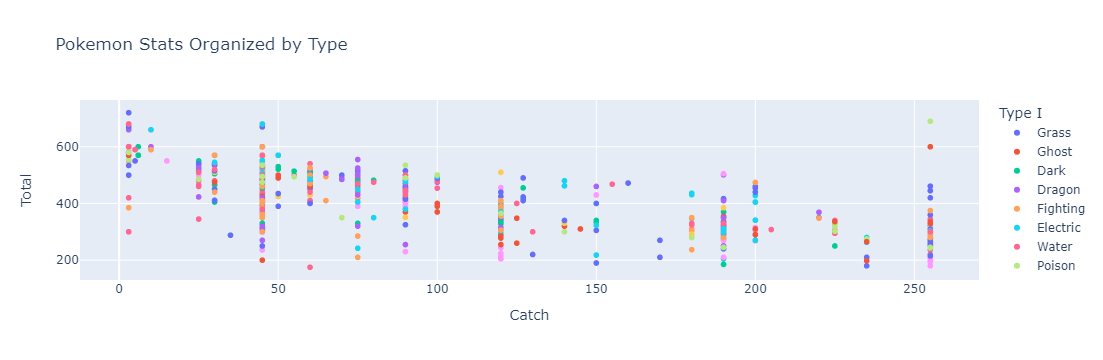

In [21]:
fig = px.scatter(pokemon_sorted, x = 'Catch', y = 'Total',
                 color = 'Type I',
                 title = 'Pokemon Stats Organized by Type')
fig.show()

In [22]:
pokemon_sorted["Catch"].fillna(0)
pokemon_sorted

,Nat,Pokemon,HP,Atk,Def,SpA,SpD,Spe,Total,Type I,Ability I,Catch
0,1,Bulbasaur,45.0,49.0,49.0,65.0,65.0,45.0,318,Grass,Overgrow,45.0
999,"1,000",Gholdengo,87.0,60.0,95.0,133.0,91.0,84.0,550,Ghost,Good as Gold,45.0
1000,"1,001",Wo-Chien,85.0,85.0,100.0,95.0,165.0,70.0,600,Dark,Tablets of Ruin,6.0
1001,"1,002",Chien-Pao,80.0,120.0,80.0,90.0,65.0,135.0,570,Dark,Sword of Ruin,6.0
1002,"1,003",Ting-Lu,155.0,110.0,125.0,55.0,80.0,45.0,570,Dark,Vessle of Ruin,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Iron Thorns,100.0,134.0,110.0,70.0,84.0,72.0,570,Rock,Quark Drive,30.0
995,996,Frigibax,65.0,75.0,45.0,35.0,45.0,55.0,320,Dragon,Thermal Exchange,45.0
996,997,Arctibax,90.0,95.0,66.0,45.0,65.0,62.0,423,Dragon,Thermal Exchange,25.0
997,998,Baxcalibur,115.0,145.0,92.0,75.0,86.0,87.0,600,Dragon,Thermal Exchange,10.0


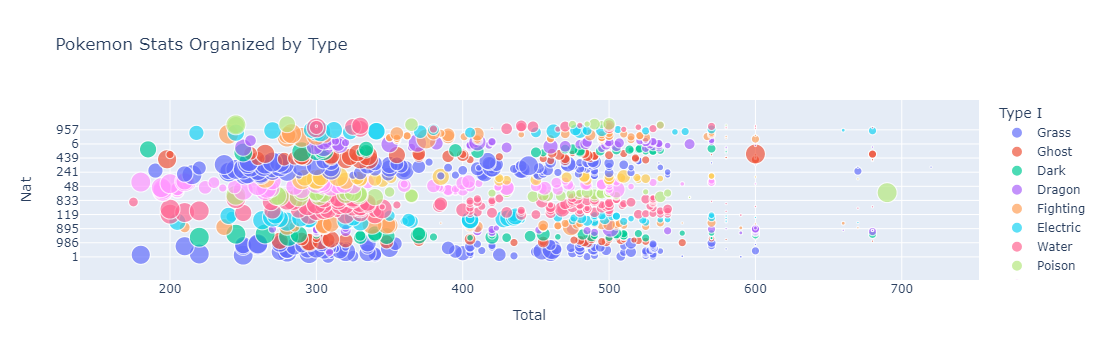

In [23]:
fig = px.scatter(pokemon_sorted, x = 'Total', y = 'Nat',
                 color = 'Type I',
                 size = 'Catch',
                 title = 'Pokemon Stats Organized by Type')
fig.show()